# Classifying Fashion-MNIST

[Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset.Fashion-MNIST is a set of 28x28 greyscale images of clothes.

<img src='assets/fashion-mnist-sprite.png' width=500px>

### Build a neural network.

Let's load the dataset through torchvision.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

from torch import nn 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import helper

plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST(root='FMNIST_data/', download=True, train=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)

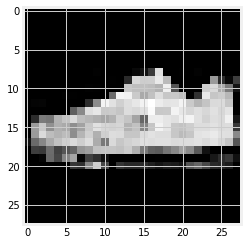

In [3]:
images, labels = next(iter(trainloader))

plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r')

## Building the network

Since we have 10 classes: \['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker',
'Bag','Ankle Boot'\], the output is 10. The size of images is 28 * 28. I will add 2 hidden layers 128, 64

In [4]:
from collections import OrderedDict

input_size = 28*28
hidden_size = [128, 64]
output_size = 10

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
    ('relu2', nn.ReLU()),
    ('logits', nn.Linear(hidden_size[1], output_size))
]))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (logits): Linear(in_features=64, out_features=10, bias=True)
)
